In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("./penguins_size.csv")
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

<Axes: xlabel='species', ylabel='count'>

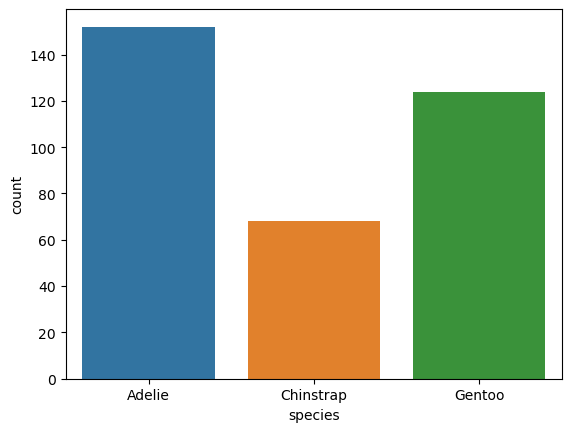

In [4]:
sns.countplot(x="species",data=data)

<Axes: xlabel='sex', ylabel='count'>

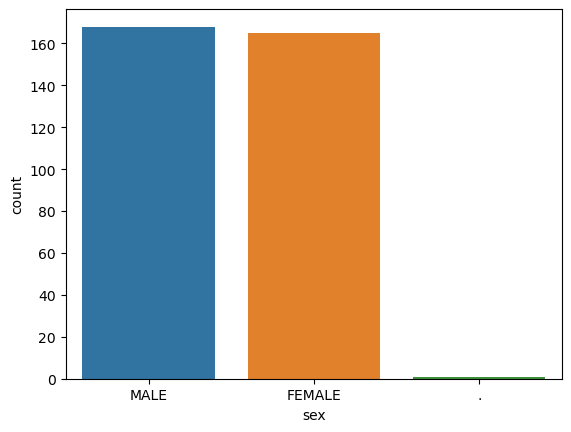

In [5]:
sns.countplot(x="sex",data=data)

<Axes: xlabel='island', ylabel='count'>

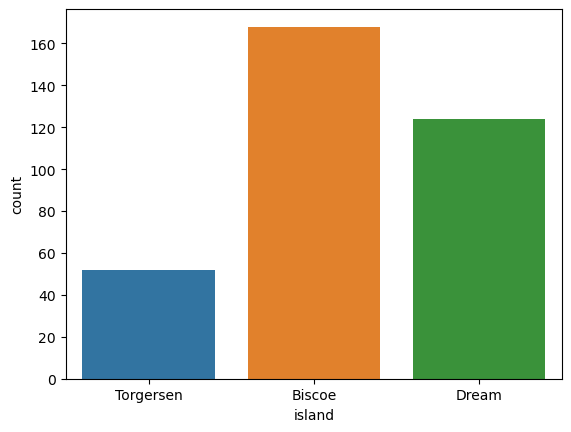

In [6]:
sns.countplot(x="island",data=data)

<Axes: xlabel='species', ylabel='culmen_length_mm'>

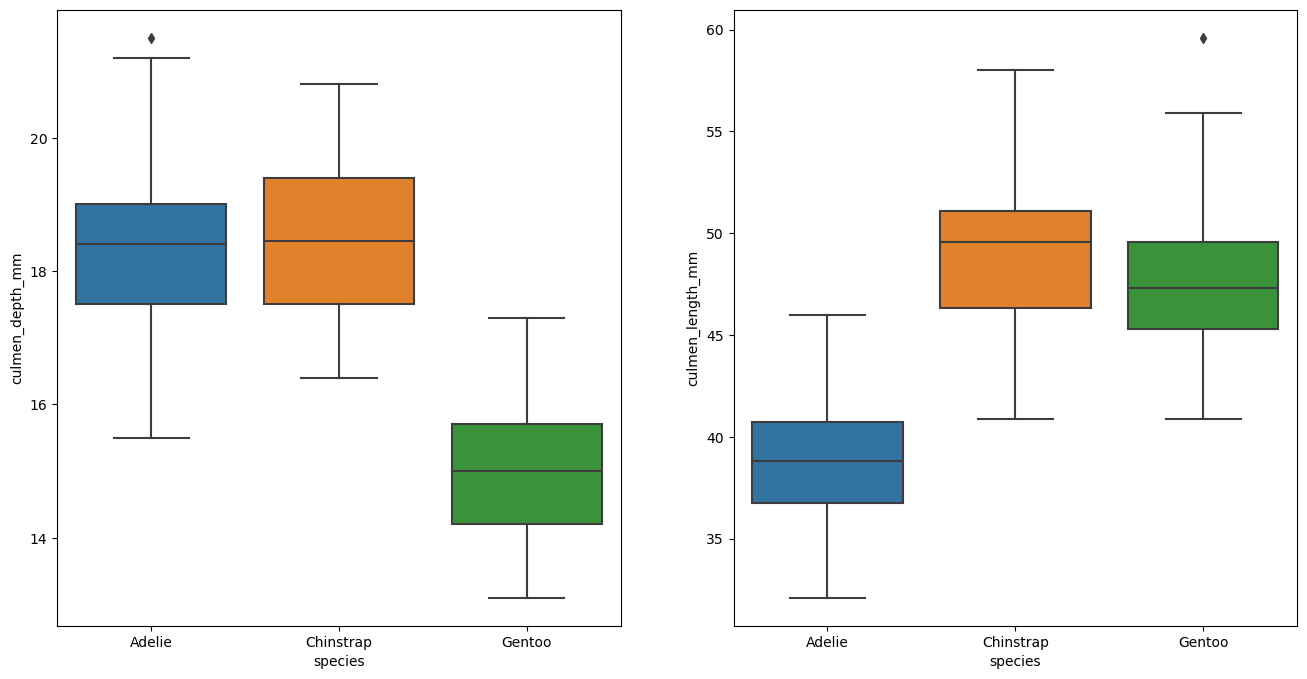

In [7]:
fig,axes=plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x="species",y="culmen_depth_mm",data=data,ax=axes[0])
sns.boxplot(x="species",y="culmen_length_mm",data=data,ax=axes[1])


<Axes: xlabel='species', ylabel='body_mass_g'>

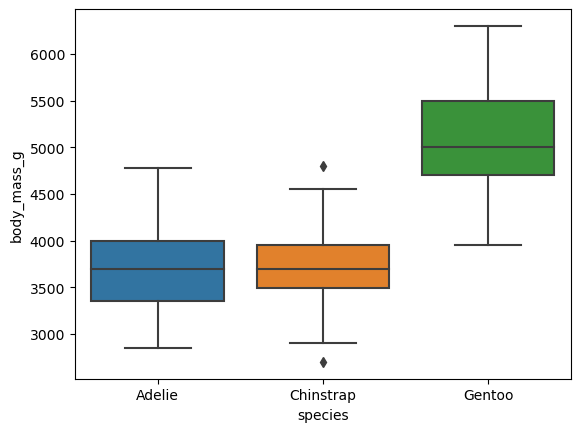

In [8]:
sns.boxplot(x="species",y="body_mass_g",data=data)

<Axes: xlabel='species', ylabel='count'>

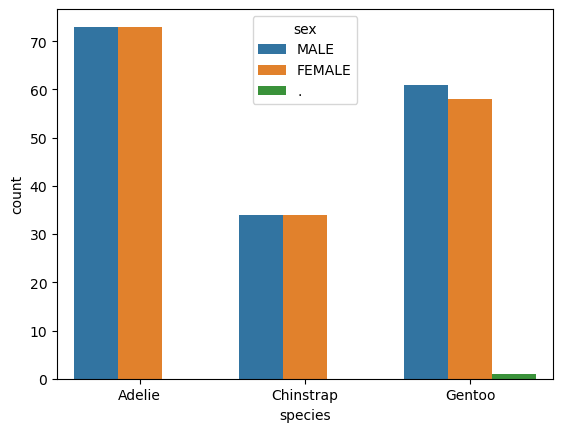

In [9]:
sns.countplot(x="species",data=data,hue="sex")

<Axes: xlabel='island', ylabel='count'>

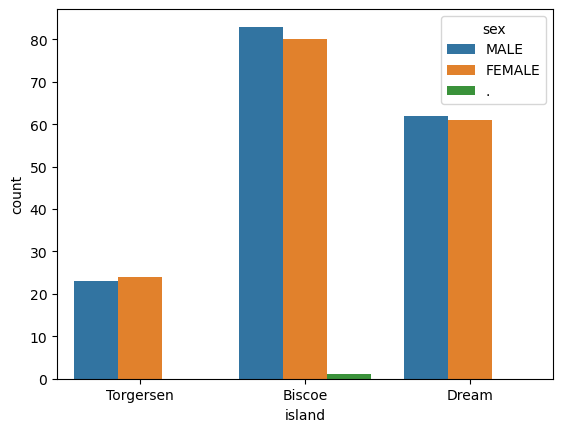

In [10]:
sns.countplot(x="island",data=data,hue="sex")

<Axes: xlabel='culmen_depth_mm', ylabel='culmen_length_mm'>

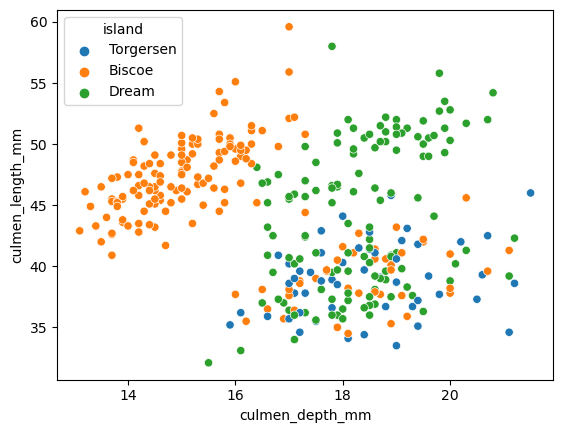

In [11]:
sns.scatterplot(x="culmen_depth_mm",y="culmen_length_mm",data=data,hue="island")

<Axes: xlabel='culmen_depth_mm', ylabel='culmen_length_mm'>

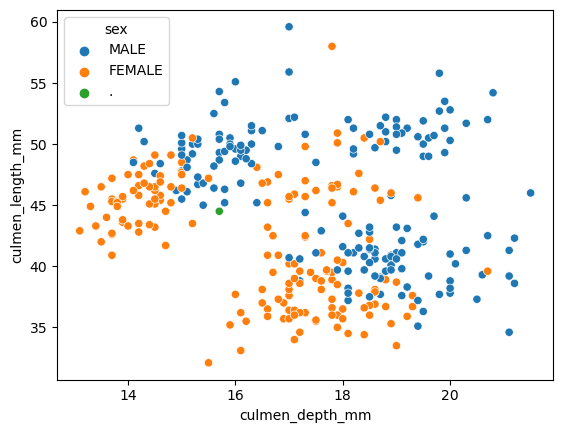

In [12]:
sns.scatterplot(x="culmen_depth_mm",y="culmen_length_mm",data=data,hue="sex")

<Axes: xlabel='culmen_depth_mm', ylabel='culmen_length_mm'>

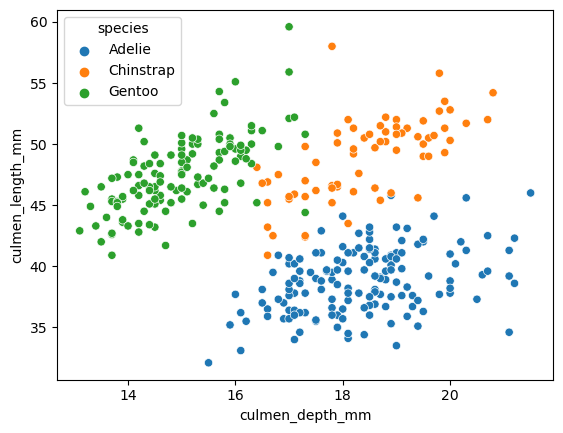

In [13]:
sns.scatterplot(x="culmen_depth_mm",y="culmen_length_mm",data=data,hue="species")

In [ ]:
sns.pairplot(data,hue="species")

In [ ]:
data["culmen_depth_mm"]=data["culmen_depth_mm"].fillna(data["culmen_depth_mm"].mean())
data["culmen_length_mm"]=data["culmen_length_mm"].fillna(data["culmen_length_mm"].mean())
data["flipper_length_mm"]=data["flipper_length_mm"].fillna(data["flipper_length_mm"].mean())
data["body_mass_g"]=data["body_mass_g"].fillna(data["body_mass_g"].mean())
data.isnull().sum()

In [ ]:
data["sex"]=data["sex"].fillna("FEMALE")
data.isnull().sum()

In [ ]:
y=data["species"]
data=data.join(pd.get_dummies(data.iloc[:,-1],drop_first=True))

In [ ]:
# x=data.drop(["species","island","sex","MALE"],axis=1,inplace=True)
x=data.iloc[:,[2,3,4,5]]
# data.head()
x.head()

In [80]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default

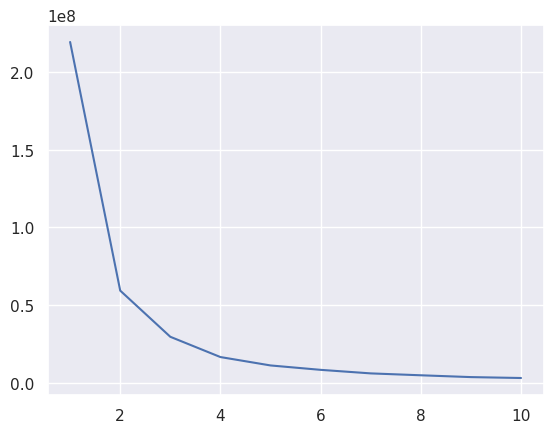

In [82]:
plt.plot(range(1,11),wcss)

In [83]:
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit(x)
pred=kmeans.predict(x)

/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [84]:
mat=pd.DataFrame({"labels":pred,"species":y})
table=pd.crosstab(mat["labels"],mat["species"])
print(table)

species  Adelie  Chinstrap  Gentoo
labels                            
0           116         53       1
1             0          0      68
2            36         15      55


In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
pipe=Pipeline([("scaler",StandardScaler()),
               ("kmean",kmeans)])
pipe.fit(x)
pred_pipe=pipe.predict(x)

/usr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [91]:
mat=pd.DataFrame({"labels":pred_pipe,"species":y})
table_piped=pd.crosstab(mat["labels"],mat["species"])
print(table_piped)

species  Adelie  Chinstrap  Gentoo
labels                            
0            25         63       1
1             0          0     123
2           127          5       0


In [92]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,pred_pipe,test_size=0.3,random_state=0)

In [97]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy",random_state=0)
model.fit(xtrain,ytrain)
model_predict=model.predict(xtest)

In [98]:
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy Score : ",round(accuracy_score(ytest,model_predict)*100,2))
print(classification_report(ytest,model_predict))

Accuracy Score :  98.08
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00        37
           2       0.98      0.98      0.98        46

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [99]:
model=DecisionTreeClassifier(criterion="gini",random_state=0)
model.fit(xtrain,ytrain)
model_predict=model.predict(xtest)

print("Accuracy Score : ",round(accuracy_score(ytest,model_predict)*100,2))
print(classification_report(ytest,model_predict))

Accuracy Score :  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        46

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [125]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=10)
random.fit(xtrain,ytrain)
random_predict=random.predict(xtest)

print("Accuracy of RandomForest : ",round(accuracy_score(ytest,random_predict)*100,2))

Accuracy of RandomForest :  99.04
